In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PIYUSH\DA\ML\Linear reg\global-data-on-sustainable-energy.csv")

In [3]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Population density pKm2,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [6]:
df.rename(columns = {'Entity':'Country', 'Access to electricity (% of population)':'Access_to_electricity', 'Access to clean fuels for cooking':'Access_to_clean_fuels_for_cooking',
                    'Renewable-electricity-generating-capacity-per-capita':'Renewable_electricity_generating_capacity_per_capita', 'Renewable energy share in the total final energy consumption (%)':'Renewable_to_total_energy_consumption_ratio', 
                    'Electricity from fossil fuels (TWh)':'Electricity_fossil_TWh', 'Electricity from nuclear (TWh)':'Electricity_nuclear_TWh', 
                    'Electricity from renewables (TWh)':'Electricity_renewables_TWh', 'Low-carbon electricity (% electricity)':'Low_carbon_electricity_%age', 'Primary energy consumption per capita (kWh/person)':'Energy_consumption_per_capita_kWh/person', 
                    'Population density pKm2':'Population_density_pKm2', 'Land Area(Km2)':'Land_Area_Km2','Energy intensity level of primary energy (MJ/$2017 PPP GDP)':'Energy_use_per_unit_GDP_PPP2017', 'Value_co2_emissions_kt_by_country':'Value_co2_emissions_kt'}, inplace=True)

In [7]:
df.columns

Index(['Country', 'Year', 'Access_to_electricity',
       'Access_to_clean_fuels_for_cooking',
       'Renewable_electricity_generating_capacity_per_capita',
       'Financial flows to developing countries (US $)',
       'Renewable_to_total_energy_consumption_ratio', 'Electricity_fossil_TWh',
       'Electricity_nuclear_TWh', 'Electricity_renewables_TWh',
       'Low_carbon_electricity_%age',
       'Energy_consumption_per_capita_kWh/person',
       'Energy_use_per_unit_GDP_PPP2017', 'Value_co2_emissions_kt',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Population_density_pKm2', 'Land_Area_Km2',
       'Latitude', 'Longitude'],
      dtype='object')

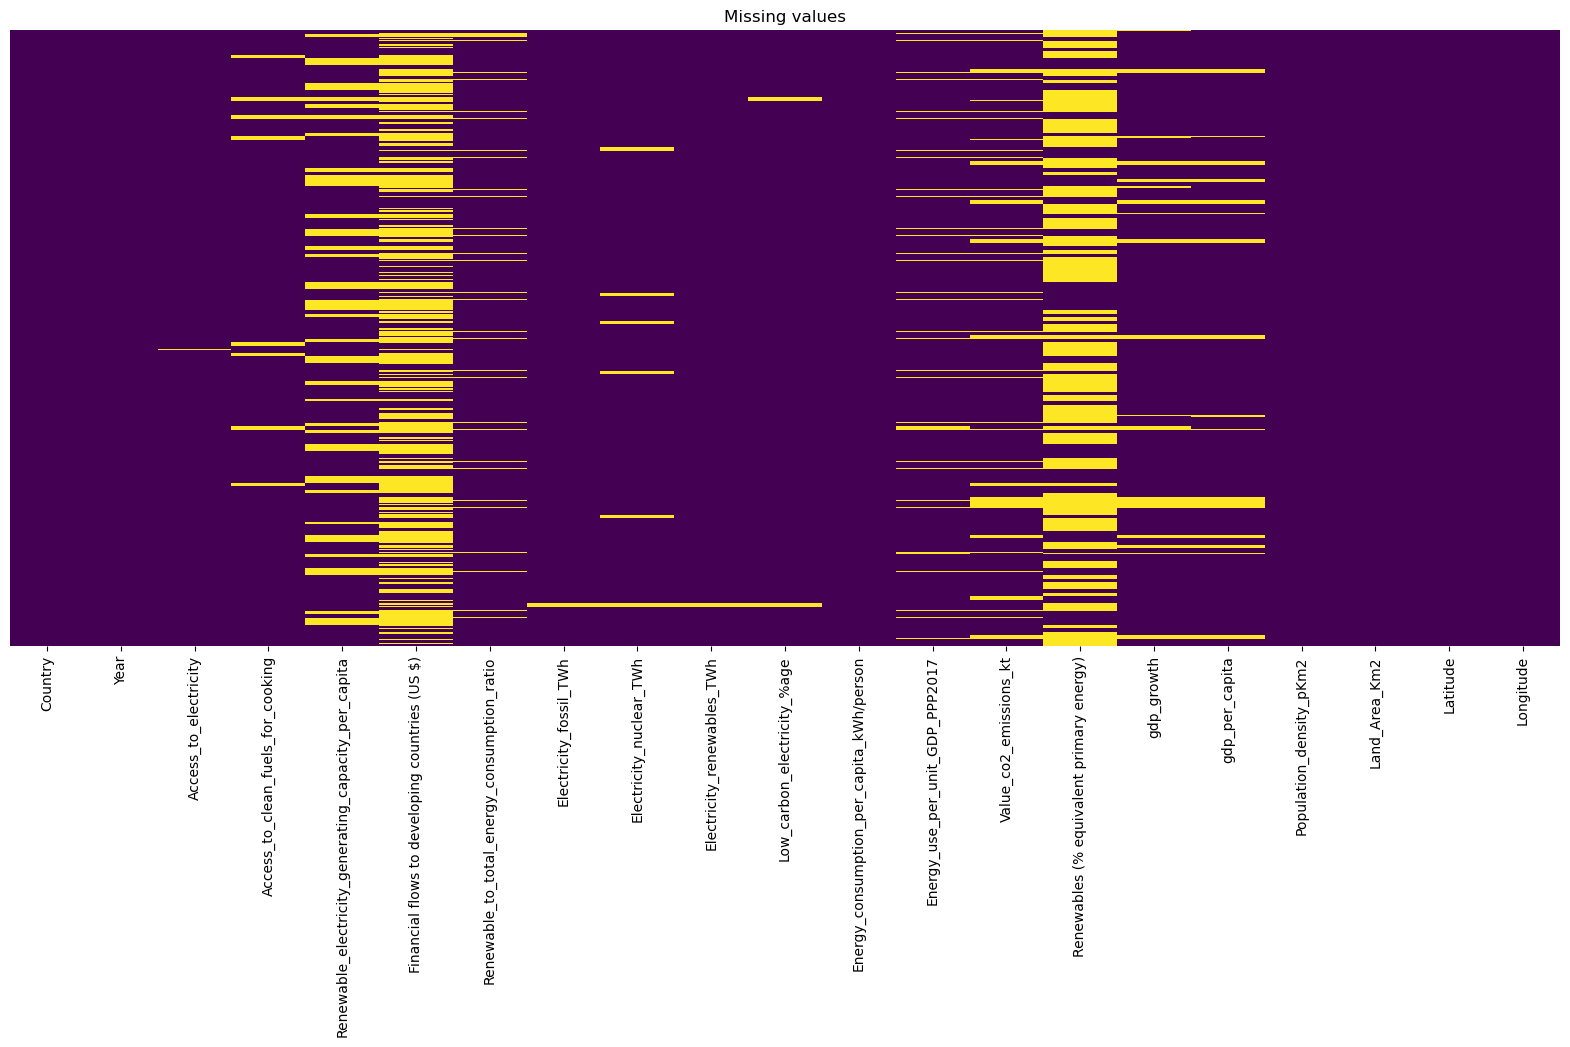

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False , cmap='viridis')
plt.title('Missing values')
plt.show()

In [9]:
df.drop(['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'], axis=1, inplace=True)

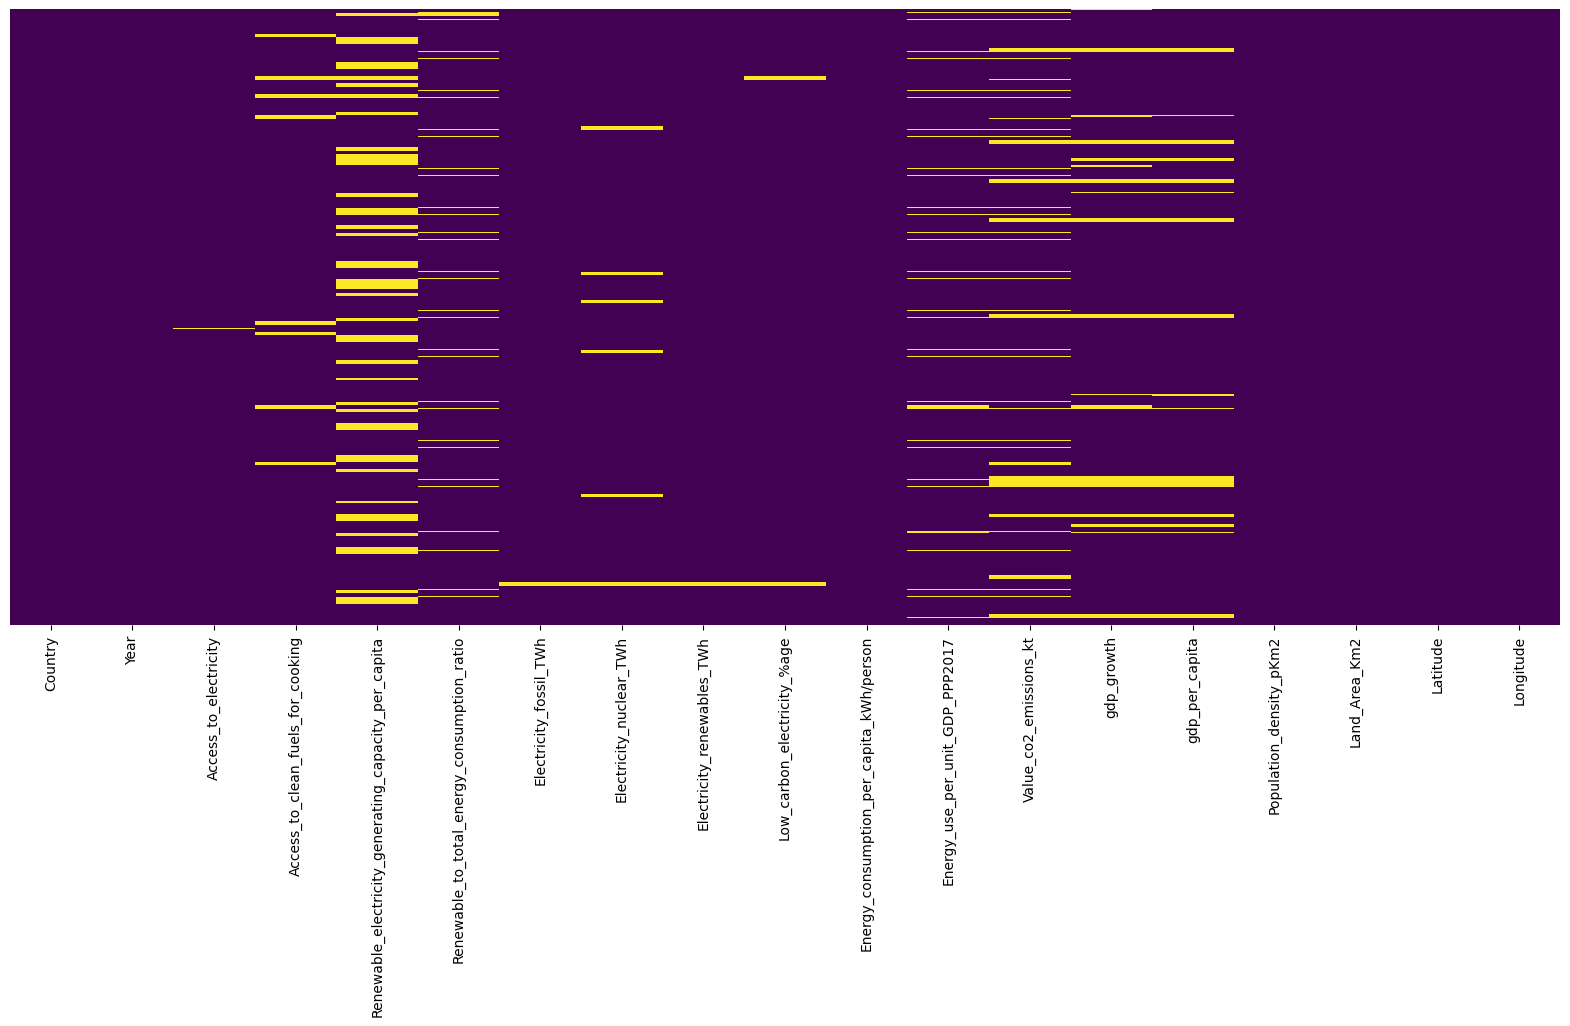

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [11]:
df[df['Access_to_electricity'].isna()]

,Country,Year,Access_to_electricity,Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Renewable_to_total_energy_consumption_ratio,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh,Low_carbon_electricity_%age,Energy_consumption_per_capita_kWh/person,Energy_use_per_unit_GDP_PPP2017,Value_co2_emissions_kt,gdp_growth,gdp_per_capita,Population_density_pKm2,Land_Area_Km2,Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,23.84,0.43,0.0,0.0,0.0,13692.39400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,Guinea-Bissau,2000,NaN,1.4,0.00,91.24,0.03,0.0,0.0,0.0,809.85490,11.19,150.000000,5.426987,308.910318,70,36125.0,11.803749,-15.180413
1409,Guinea-Bissau,2001,NaN,1.3,0.00,91.21,0.03,0.0,0.0,0.0,807.33746,11.13,150.000000,2.188907,319.957449,70,36125.0,11.803749,-15.180413
1891,Liberia,2000,NaN,0.7,1.40,90.88,0.20,0.0,0.0,0.0,653.12030,10.09,430.000000,NaN,306.833864,53,111369.0,6.428055,-9.429499
1892,Liberia,2001,NaN,0.6,1.35,90.86,0.20,0.0,0.0,0.0,676.39770,10.25,450.000000,2.920273,306.710252,53,111369.0,6.428055,-9.429499
1893,Liberia,2002,NaN,0.6,1.32,91.14,0.20,0.0,0.0,0.0,650.02580,10.24,449.999988,3.763018,306.473940,53,111369.0,6.428055,-9.429499
1894,Liberia,2003,NaN,0.6,1.30,90.35,0.20,0.0,0.0,0.0,706.21320,15.37,479.999989,-30.145133,243.089577,53,111369.0,6.428055,-9.429499
1895,Liberia,2004,NaN,0.5,1.28,89.56,0.20,0.0,0.0,0.0,756.93256,15.70,560.000002,2.619848,286.064725,53,111369.0,6.428055,-9.429499
1896,Liberia,2005,NaN,0.5,1.24,87.76,0.20,0.0,0.0,0.0,846.99274,15.82,670.000017,5.281212,294.893220,53,111369.0,6.428055,-9.429499
1897,Liberia,2006,NaN,0.5,1.20,87.59,0.20,0.0,0.0,0.0,820.09924,15.19,689.999998,8.043906,336.115674,53,111369.0,6.428055,-9.429499


In [12]:
df.isna().sum()

Country                                                   0
Year                                                      0
Access_to_electricity                                    10
Access_to_clean_fuels_for_cooking                       169
Renewable_electricity_generating_capacity_per_capita    931
Renewable_to_total_energy_consumption_ratio             194
Electricity_fossil_TWh                                   21
Electricity_nuclear_TWh                                 126
Electricity_renewables_TWh                               21
Low_carbon_electricity_%age                              42
Energy_consumption_per_capita_kWh/person                  0
Energy_use_per_unit_GDP_PPP2017                         207
Value_co2_emissions_kt                                  428
gdp_growth                                              317
gdp_per_capita                                          282
Population_density_pKm2                                   1
Land_Area_Km2                           

In [13]:
df['Access_to_electricity'] = df['Access_to_electricity'].ffill()
df['Access_to_clean_fuels_for_cooking'] = df['Access_to_clean_fuels_for_cooking'].ffill()
df['Renewable_electricity_generating_capacity_per_capita'] = df['Renewable_electricity_generating_capacity_per_capita'].fillna(df['Renewable_electricity_generating_capacity_per_capita'].mode()[0])
df['Renewable_to_total_energy_consumption_ratio'] = df['Renewable_to_total_energy_consumption_ratio'].fillna(df['Renewable_to_total_energy_consumption_ratio'].mode()[0])
df['Electricity_fossil_TWh'] = df['Electricity_fossil_TWh'].ffill()
df['Electricity_nuclear_TWh'] = df['Electricity_nuclear_TWh'].ffill()
df['Electricity_renewables_TWh'] = df['Electricity_renewables_TWh'].ffill()
df['Low_carbon_electricity_%age'] = df['Low_carbon_electricity_%age'].ffill()
df['Energy_use_per_unit_GDP_PPP2017'] = df['Energy_use_per_unit_GDP_PPP2017'].fillna(df['Energy_use_per_unit_GDP_PPP2017'].mode()[0])
df['Value_co2_emissions_kt'] = df['Value_co2_emissions_kt'].fillna(df['Value_co2_emissions_kt'].mode()[0])
df['gdp_growth'] = df['gdp_growth'].fillna(df['gdp_growth'].mode()[0])
df['gdp_per_capita'] = df['gdp_per_capita'].fillna(df['gdp_per_capita'].mode()[0])
df['Population_density_pKm2'] = df['Population_density_pKm2'].ffill()
df['Land_Area_Km2'] = df['Land_Area_Km2'].fillna(df['Land_Area_Km2'].mode()[0])
df['Latitude'] = df['Latitude'].bfill()
df['Longitude'] = df['Longitude'].bfill()

In [14]:
df.isna().sum()

Country                                                 0
Year                                                    0
Access_to_electricity                                   0
Access_to_clean_fuels_for_cooking                       0
Renewable_electricity_generating_capacity_per_capita    0
Renewable_to_total_energy_consumption_ratio             0
Electricity_fossil_TWh                                  0
Electricity_nuclear_TWh                                 0
Electricity_renewables_TWh                              0
Low_carbon_electricity_%age                             0
Energy_consumption_per_capita_kWh/person                0
Energy_use_per_unit_GDP_PPP2017                         0
Value_co2_emissions_kt                                  0
gdp_growth                                              0
gdp_per_capita                                          0
Population_density_pKm2                                 0
Land_Area_Km2                                           0
Latitude      

In [15]:
df['Population_density_pKm2'] = df['Population_density_pKm2'].str.replace(',','')

In [16]:
df['Population_density_pKm2'] = pd.to_numeric(df['Population_density_pKm2'])

In [17]:
df.shape

(3649, 19)

In [18]:
df.head()

,Country,Year,Access_to_electricity,Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Renewable_to_total_energy_consumption_ratio,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh,Low_carbon_electricity_%age,Energy_consumption_per_capita_kWh/person,Energy_use_per_unit_GDP_PPP2017,Value_co2_emissions_kt,gdp_growth,gdp_per_capita,Population_density_pKm2,Land_Area_Km2,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,0.200000,111.927225,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,0.200000,111.927225,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,0.200000,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [19]:
df['Country'].nunique()

176

# DATA VISUALIZATON

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_18204\3611941492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


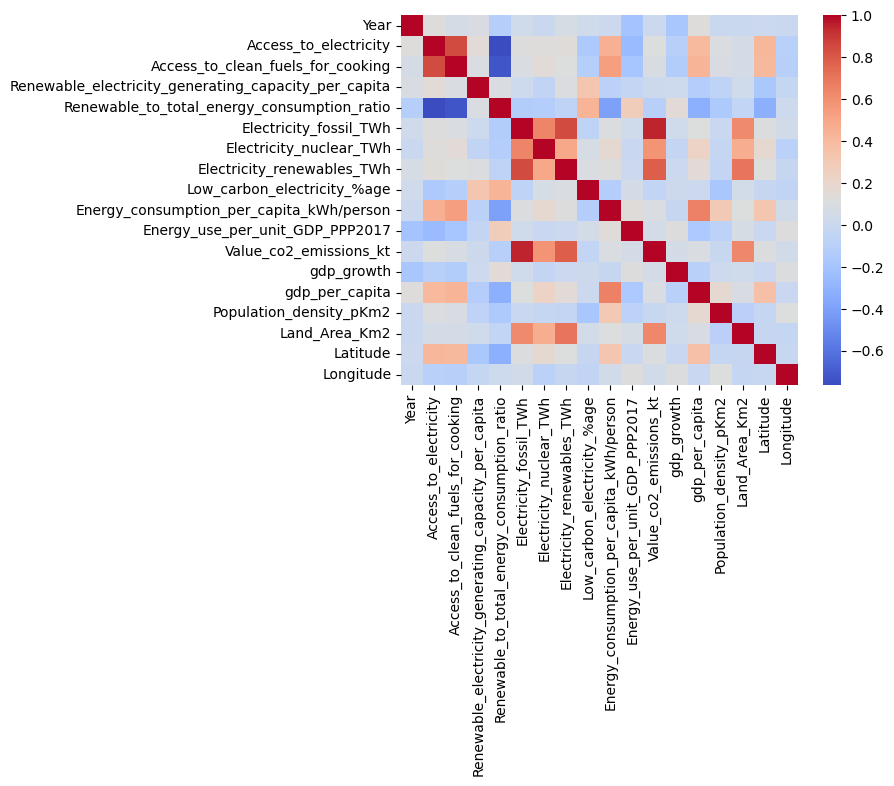

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [21]:
df.head()

,Country,Year,Access_to_electricity,Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Renewable_to_total_energy_consumption_ratio,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh,Low_carbon_electricity_%age,Energy_consumption_per_capita_kWh/person,Energy_use_per_unit_GDP_PPP2017,Value_co2_emissions_kt,gdp_growth,gdp_per_capita,Population_density_pKm2,Land_Area_Km2,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,0.200000,111.927225,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,0.200000,111.927225,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,0.200000,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [22]:
df_ordered_gdp = df.groupby('Country')['gdp_per_capita', 'Electricity_fossil_TWh','Electricity_nuclear_TWh', 'Electricity_renewables_TWh'].max()

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_18204\3910061827.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ordered_gdp = df.groupby('Country')['gdp_per_capita', 'Electricity_fossil_TWh','Electricity_nuclear_TWh', 'Electricity_renewables_TWh'].max()


In [23]:
df_ordered_gdp = df_ordered_gdp.sort_values(by='gdp_per_capita', ascending=True)

In [24]:
df_ordered_gdp

,gdp_per_capita,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh
Country,,,,
Kyrgyzstan,111.927225,2.36,0.00,14.80
Yemen,111.927225,7.99,0.00,0.49
Congo,111.927225,2.87,0.00,1.24
Slovakia,111.927225,9.68,18.01,6.85
Saint Vincent and the Grenadines,111.927225,0.13,0.00,0.04
...,...,...,...,...
Switzerland,91254.034760,3.69,26.49,40.79
Cayman Islands,91392.642590,0.68,0.00,0.02
Norway,102913.450800,5.12,0.00,152.09


In [25]:
df_ordered_gdp = df_ordered_gdp.T

In [26]:
df_ordered_gdp.drop('gdp_per_capita', axis=0, inplace=True)

In [27]:
df_ordered_gdp

Country,Kyrgyzstan,Yemen,Congo,Slovakia,Saint Vincent and the Grenadines,Saint Lucia,Saint Kitts and Nevis,Czechia,Egypt,French Guiana,...,Singapore,Australia,Iceland,Qatar,Ireland,Switzerland,Cayman Islands,Norway,Bermuda,Luxembourg
Electricity_fossil_TWh,2.36,7.99,2.87,9.68,0.13,0.38,0.21,58.18,182.31,0.43,...,50.96,216.42,0.01,46.98,26.32,3.69,0.68,5.12,0.0,3.29
Electricity_nuclear_TWh,0.00,0.00,0.00,18.01,0.00,0.00,0.00,30.75,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,26.49,0.00,0.00,0.0,0.00
Electricity_renewables_TWh,14.80,0.49,1.24,6.85,0.04,0.00,0.01,10.39,20.83,0.00,...,0.83,63.99,19.43,0.03,13.46,40.79,0.02,152.09,0.0,0.97


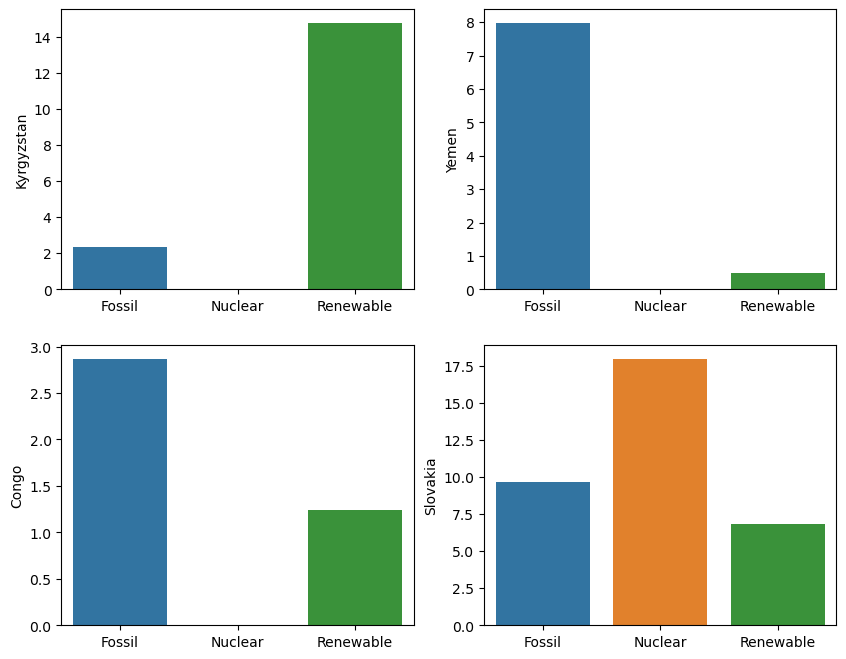

In [28]:
countries = ['Kyrgyzstan', 'Yemen', 'Congo', 'Slovakia']
labels = ['Fossil', 'Nuclear', 'Renewable']

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        sns.barplot(x=df_ordered_gdp.index, y=df_ordered_gdp[countries[i * 2 + j]], ax=ax[i, j])
        ax[i, j].set_xticklabels(labels)

plt.show()

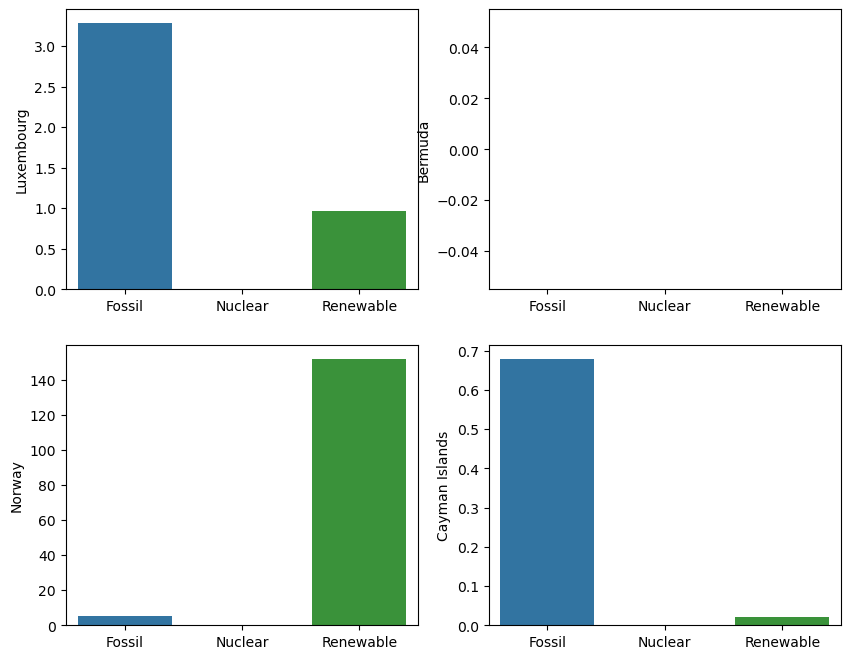

In [29]:
countries1 = ['Luxembourg', 'Bermuda', 'Norway', 'Cayman Islands']
labels1 = ['Fossil', 'Nuclear', 'Renewable']

fig, ax = plt.subplots(2,2, figsize=(10,8))

for i in range(2):
    for j in range(2):
        sns.barplot(x=df_ordered_gdp.index, y=df_ordered_gdp[countries1[i*2+j]], ax=ax[i, j])
        ax[i, j].set_xticklabels(labels1)

In [30]:
df

,Country,Year,Access_to_electricity,Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Renewable_to_total_energy_consumption_ratio,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh,Low_carbon_electricity_%age,Energy_consumption_per_capita_kWh/person,Energy_use_per_unit_GDP_PPP2017,Value_co2_emissions_kt,gdp_growth,gdp_per_capita,Population_density_pKm2,Land_Area_Km2,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,0.200000,111.927225,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,0.200000,111.927225,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,0.200000,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [31]:
for i, c in df.iterrows():
    if c['Value_co2_emissions_kt'] == df['Value_co2_emissions_kt'].max():
        print(c)

Country                                                       China
Year                                                           2019
Access_to_electricity                                         100.0
Access_to_clean_fuels_for_cooking                              77.6
Renewable_electricity_generating_capacity_per_capita         529.28
Renewable_to_total_energy_consumption_ratio                   14.45
Electricity_fossil_TWh                                      5098.22
Electricity_nuclear_TWh                                       348.7
Electricity_renewables_TWh                                  2014.57
Low_carbon_electricity_%age                               31.672895
Energy_consumption_per_capita_kWh/person                  28277.445
Energy_use_per_unit_GDP_PPP2017                                6.31
Value_co2_emissions_kt                                  10707219.73
gdp_growth                                                 5.949714
gdp_per_capita                                  

In [32]:
df_ordered_co2 = df.groupby('Country')['Value_co2_emissions_kt'].mean()

In [33]:
import geopandas as gpd

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_ordered_co2, left_on='name', right_on='Country')

C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_18204\3524092211.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


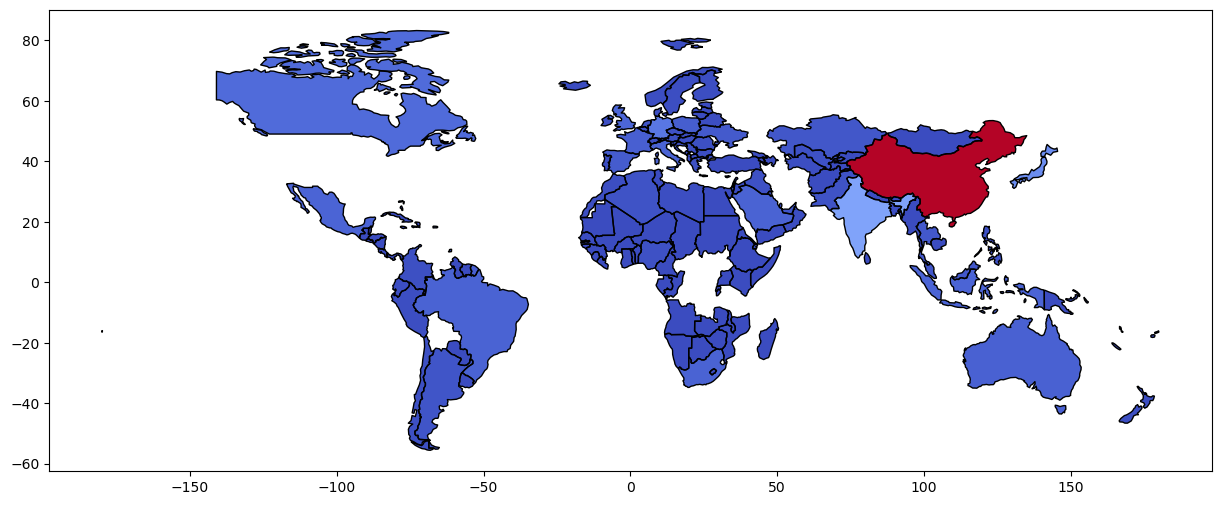

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='k')
world.plot(column='Value_co2_emissions_kt', cmap='coolwarm', ax=ax)
plt.show()

In [36]:
top_5_co2 = df_ordered_co2.nlargest(5)

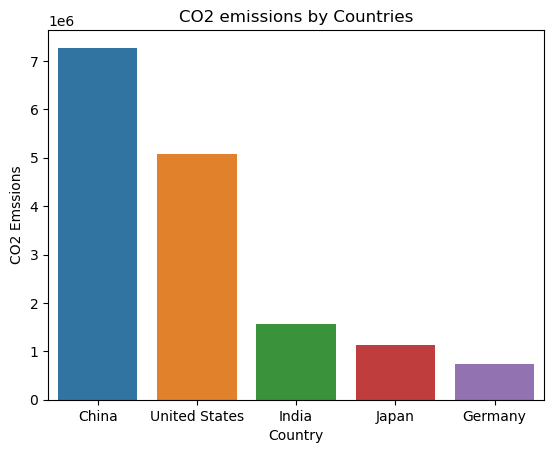

In [37]:
sns.barplot(x=top_5_co2.index, y=top_5_co2.values)
plt.ylabel('CO2 Emssions')
plt.title('CO2 emissions by Countries')
plt.show()

In [38]:
China = df[df['Country'] == 'China']

In [39]:
US = df[df['Country'] == 'United States']

In [40]:
India = df[df['Country'] == 'India']

In [41]:
Japan = df[df['Country'] == 'Japan']

In [42]:
Germany = df[df['Country'] == 'Germany']

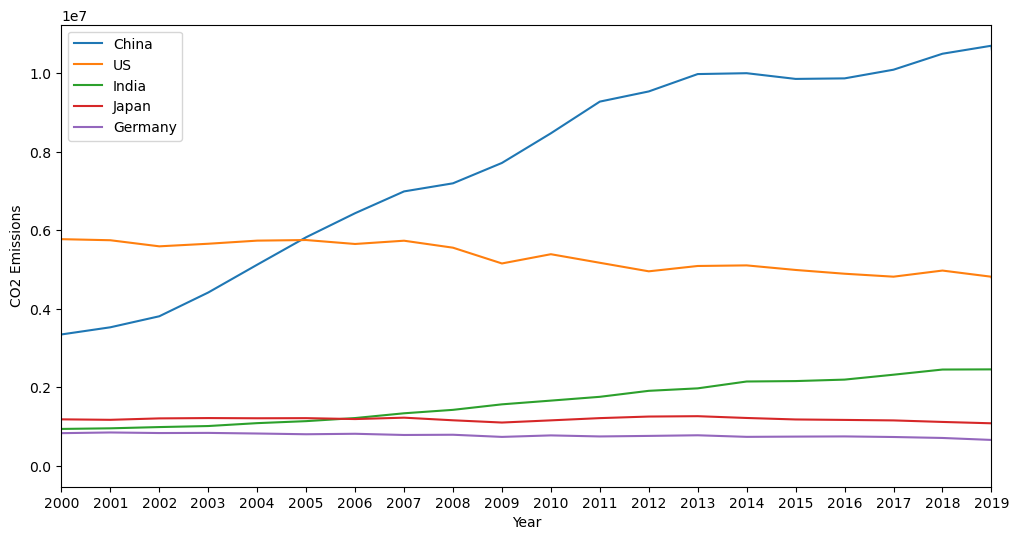

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=China['Year'], y=China['Value_co2_emissions_kt'], label='China')
sns.lineplot(x=US['Year'], y=US['Value_co2_emissions_kt'], label='US')
sns.lineplot(x=India['Year'], y=India['Value_co2_emissions_kt'], label='India')
sns.lineplot(x=Japan['Year'], y=Japan['Value_co2_emissions_kt'], label='Japan')
sns.lineplot(x=Germany['Year'], y=Germany['Value_co2_emissions_kt'], label='Germany')

plt.xticks(range(2000, 2020))
plt.xlim(2000, 2019)
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

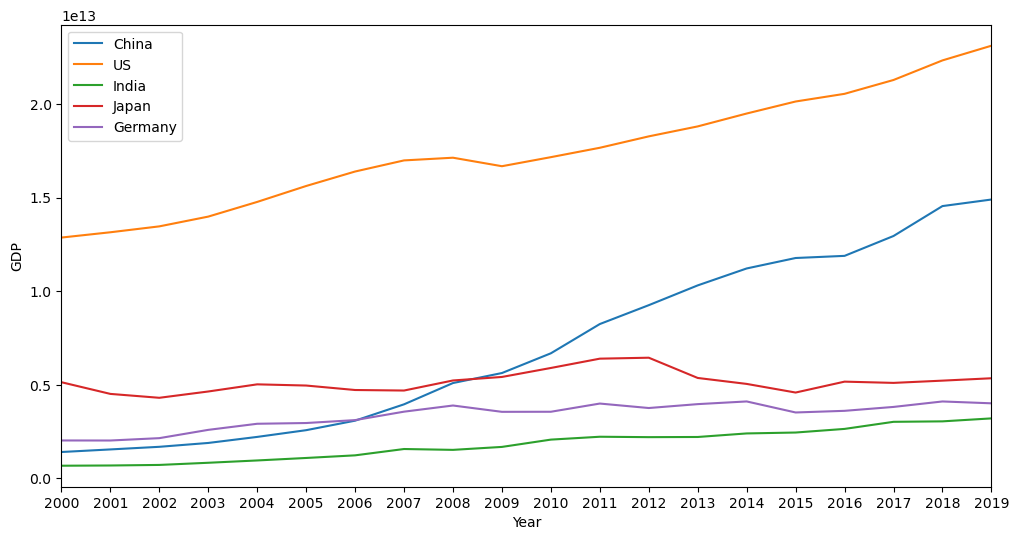

In [44]:
plt.figure(figsize=(12,6))

sns.lineplot(x=China['Year'], y=China['gdp_per_capita']*(China['Population_density_pKm2']*China['Land_Area_Km2']), label='China')
sns.lineplot(x=US['Year'], y=US['gdp_per_capita']*(US['Population_density_pKm2']*US['Land_Area_Km2']), label='US')
sns.lineplot(x=India['Year'], y=India['gdp_per_capita']*(India['Population_density_pKm2']*India['Land_Area_Km2']), label='India')
sns.lineplot(x=Japan['Year'], y=Japan['gdp_per_capita']*(Japan['Population_density_pKm2']*Japan['Land_Area_Km2']), label='Japan')
sns.lineplot(x=Germany['Year'], y=Germany['gdp_per_capita']*(Germany['Population_density_pKm2']*Germany['Land_Area_Km2']), label='Germany')

plt.xticks(range(2000, 2020))
plt.xlim(2000, 2019)
plt.ylabel('GDP')
plt.legend()
plt.show()

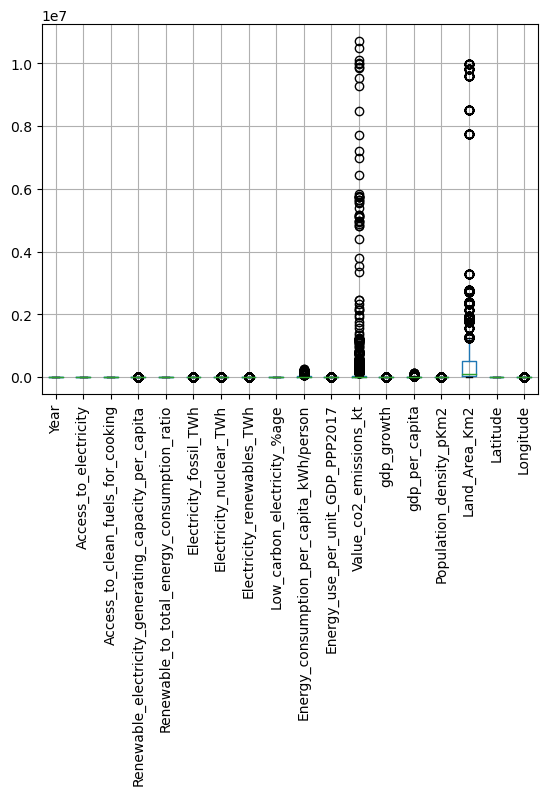

In [45]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# ML Model

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel

In [47]:
df

,Country,Year,Access_to_electricity,Access_to_clean_fuels_for_cooking,Renewable_electricity_generating_capacity_per_capita,Renewable_to_total_energy_consumption_ratio,Electricity_fossil_TWh,Electricity_nuclear_TWh,Electricity_renewables_TWh,Low_carbon_electricity_%age,Energy_consumption_per_capita_kWh/person,Energy_use_per_unit_GDP_PPP2017,Value_co2_emissions_kt,gdp_growth,gdp_per_capita,Population_density_pKm2,Land_Area_Km2,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,0.200000,111.927225,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,0.200000,111.927225,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,0.200000,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


<Axes: >

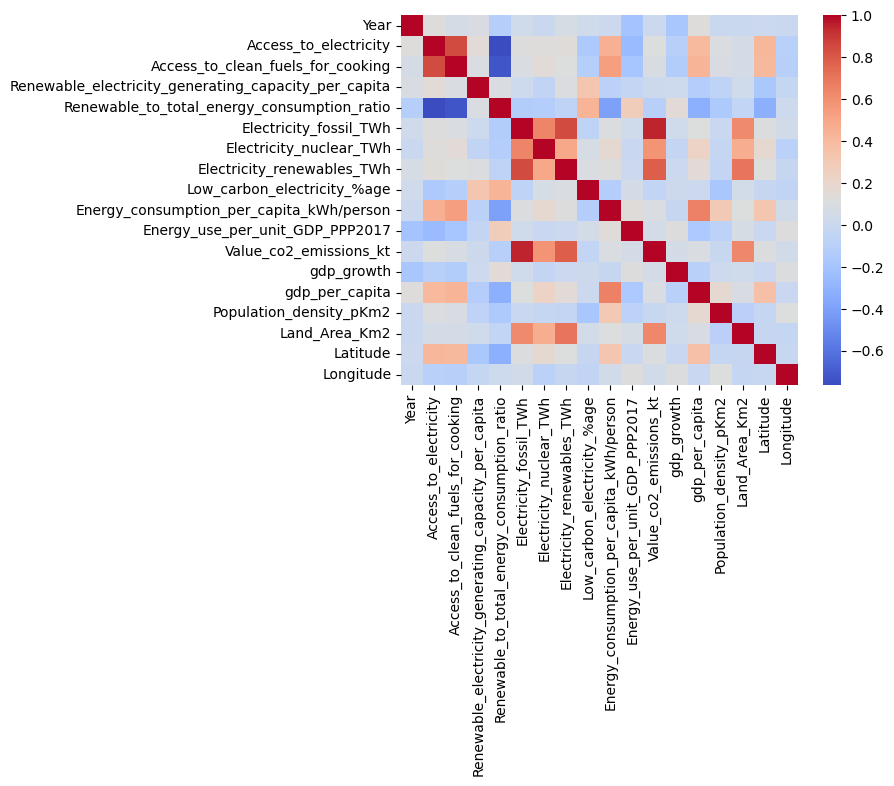

In [48]:
sns.heatmap(corr, cmap='coolwarm')

In [49]:
indep_var = ['Access_to_electricity', 'Access_to_clean_fuels_for_cooking', 'Electricity_fossil_TWh',
             'Electricity_renewables_TWh', 'Value_co2_emissions_kt']
target = ['Energy_consumption_per_capita_kWh/person']

In [50]:
X = df[indep_var]
y = df[target].values.ravel()

In [51]:
X

,Access_to_electricity,Access_to_clean_fuels_for_cooking,Electricity_fossil_TWh,Electricity_renewables_TWh,Value_co2_emissions_kt
0,1.613591,6.2,0.16,0.31,760.000000
1,4.074574,7.2,0.09,0.50,730.000000
2,9.409158,8.2,0.13,0.56,1029.999971
3,14.738506,9.5,0.31,0.63,1220.000029
4,20.064968,10.9,0.33,0.56,1029.999971
...,...,...,...,...,...
3644,42.561730,29.8,3.50,3.32,11020.000460
3645,44.178635,29.8,3.05,4.30,10340.000150
3646,45.572647,29.9,3.73,5.46,12380.000110
3647,46.781475,30.1,3.66,4.58,11760.000230


In [52]:
y

array([ 302.59482,  236.89185,  210.86215, ..., 3441.9858 , 3003.6553 ,
       2680.1318 ])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Machine Learning 
## Linear Regression Model

In [54]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)

In [55]:
lrmodel.intercept_

-4315.276526147929

In [56]:
lrmodel.coef_

array([-1.32090685e+01,  4.78026972e+02, -2.32907935e+00,  1.44179576e+01,
        1.64772095e-03])

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_pred)

In [58]:
print('Mean_absolute_error:',mae)
print('Mean_squared_error:',mse)
print('Root_mean_squared_error:',rmse)
print('R2 score:',R2)

Mean_absolute_error: 17703.93712721878
Mean_squared_error: 811303962.5994955
Root_mean_squared_error: 28483.39801708173
R2 score: 0.30062309971240075


## Ridge Model

In [59]:
ridge_model = Ridge(alpha=0.9)
ridge_score = cross_val_score(ridge_model, X_train, y_train, cv=5)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [60]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
R2_score = r2_score(y_test, ridge_pred)

In [61]:
print('Ridge absolute error:', ridge_mae)
print('Ridge mean squared error:', ridge_mse)
print('Ridge root mean squared error:', ridge_rmse)
print('Ridge R2 score:', R2_score)

Ridge absolute error: 17703.93667069422
Ridge mean squared error: 811303953.2131003
Ridge root mean squared error: 28483.397852312148
Ridge R2 score: 0.3006231078038538


## Lasso Model

In [62]:
lasso_model = Ridge(alpha=0.9)
lasso_score = cross_val_score(lasso_model, X, y, cv=5)
lasso_model.fit(X_train, y_train)
losso_pred = lasso_model.predict(X_test)

In [63]:
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

In [64]:
print('Lasso absolute error:', lasso_mae)
print('Lasso mean squared error:', lasso_mse)
print('Lasso root mean squared error:', lasso_rmse)
print('Lasso R2 score:', lasso_r2)

Lasso absolute error: 17703.93712721878
Lasso mean squared error: 811303962.5994955
Lasso root mean squared error: [ 34.66684006  52.62166854  58.66843956  98.00696914 189.47577682
 122.84204899 108.18216119 147.78486052 343.20967352  22.43339809
  23.95210951  92.89533357 134.70762042  44.36381634 151.81196593
 108.387896    63.26724982 142.90660237  15.371524    77.92217913
  57.71720194 163.44742274 306.93909819 186.30399888  79.9118164
 132.46426311  92.98781641 103.4374642  104.1856468  264.03444851
  28.79777682 218.14738137  67.39406799 149.68463515  55.8241471
  68.74797452 150.12457161 101.28610961  42.35891288  62.1363034
 192.77678024  13.91956896 168.41880239  78.08012743  86.19664901
 111.88118698  31.36356485 205.24205222  26.82927319 177.39797068
 150.53164119 173.65097754  45.32382155 195.51388697 213.68149195
 309.17952714  99.41827297  95.69954545 104.14164873  20.57894434
 149.91593311 213.55641877  50.60792428 198.5577246   30.36681412
 107.45052815  66.89085887 138

## MM estimator - HuberRegressor

In [65]:
from sklearn.linear_model import HuberRegressor

In [66]:
huber_regressor = HuberRegressor(epsilon=1.35)
huber_regressor.fit(X_train, y_train)
huber_pred = huber_regressor.predict(X_test)

In [67]:
huber_mae = mean_absolute_error(y_test, huber_pred)
huber_mse = mean_squared_error(y_test, huber_pred)
huber_rmse = np.sqrt(huber_mse)
huber_r2 = r2_score(y_test, huber_pred)

In [68]:
print('Huber mean absolute error:', huber_mae)
print('Huber mean squared erroe:'), huber_mse
print('Huber root mean squared error:', huber_rmse)
print('Huber R2 score:', huber_r2)

Huber mean absolute error: 25549.45450820623
Huber mean squared erroe:
Huber root mean squared error: 42104.6908637152
Huber R2 score: -0.5282297607133299


## M estimate

In [69]:
import statsmodels.api as sm

In [70]:
sm_model = sm.RLM(y_test, sm.add_constant(X_test), M=sm.robust.norms.HuberT())
results = sm_model.fit()
robust_coefficients = results.params
print("Robust Coefficients (Intercept, Slope):", robust_coefficients)

Robust Coefficients (Intercept, Slope): const                               -2635.653413
Access_to_electricity                  17.232006
Access_to_clean_fuels_for_cooking     314.081322
Electricity_fossil_TWh                 41.352398
Electricity_renewables_TWh             30.462341
Value_co2_emissions_kt                 -0.015461
dtype: float64


## MM estimate : RANSAC regression

In [71]:
# MM estimate: RANSAC regression
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
ransac = RANSACRegressor()
mm= ransac.fit(X_test, y_test)
mm_estimate_coeff = ransac.estimator_.coef_
mm_estimate_intercept = ransac.estimator_.intercept_
mm_prediction = ransac.predict(X_test)
print("MM Estimate Coefficients:", mm_estimate_coeff)
print("MM Estimate Intercept:", mm_estimate_intercept)
mm_mae =mean_absolute_error(y_test,mm_prediction)
mm_mse =mean_squared_error(y_test,mm_prediction)
mm_rmse = np.sqrt(mm_mse)
mm_r2 = r2_score(y_test,huber_pred)
print('mm mae:',mm_mae)
print('mm mse:',mm_mse)
print('mm rmse:',mm_rmse)
print('mm r2:',mm_r2)

MM Estimate Coefficients: [ 1.74127197e+01  1.46378002e+02  6.46526984e+02  2.36499155e+02
 -1.49942559e-01]
MM Estimate Intercept: -857.3652928496685
mm mae: 29084.759910188524
mm mse: 10513372071.225485
mm rmse: 102534.73592507801
mm r2: -0.5282297607133299


## Lts estimate

In [72]:
# lts estimate
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

ransac.fit(X_test, y_test)

lts_estimate_coeff = ransac.estimator_.coef_
lts_estimate_intercept = ransac.estimator_.intercept_

print("LTS Estimate Coefficients:", lts_estimate_coeff)
print("LTS Estimate Intercept:", lts_estimate_intercept)

lts_prediction = ransac.predict(X_test)
lts_mae =mean_absolute_error(y_test,lts_prediction)
lts_mse =mean_squared_error(y_test,lts_prediction)
lts_rmse = np.sqrt(lts_mse)
lts_r2 = r2_score(y_test,huber_pred)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

LTS Estimate Coefficients: [ 1.42635795e+01  1.61565815e+02 -6.39150409e+01  2.78235251e+02
  2.78609670e-02]
LTS Estimate Intercept: -1099.6429096766715
lts mae: 17515.496032909814
lts mse: 1235740356.4461744
lts rmse: 35153.098817119586
lts r2: -0.5282297607133299


## S estimate

In [73]:
#S estimate
import statsmodels.api as sm

smmodel = sm.RLM(y_test, X_test, M=sm.robust.norms.HuberT())

# Fit the model to the data
results = smmodel.fit()

# Extract the S-estimate of coefficients
s_estimate_intercept = results.params[0]
s_estimate_coefficient = results.params[1]


print("S-estimate Intercept:", s_estimate_intercept)
print("S-estimate Coefficient:", s_estimate_coefficient)

s_prediction = results.predict(X_test)
s_mae =mean_absolute_error(y_test,s_prediction)
s_mse =mean_squared_error(y_test,s_prediction)
s_rmse = np.sqrt(s_mse)
s_r2 = r2_score(y_test,s_prediction)
print('s mae:',s_mae)
print('s mse:',s_mse)
print('s rmse:',s_rmse)
print('s r2:',s_r2)

S-estimate Intercept: -26.265605507689543
S-estimate Coefficient: 331.73884890783825
s mae: 15614.285619472108
s mse: 872987942.1203876
s rmse: 29546.36935598666
s r2: 0.24744900913295942


## Theil sen regressor

In [74]:
# theil sen regressor
from sklearn.linear_model import TheilSenRegressor

# Create a Theil-Sen estimator model
theil_sen = TheilSenRegressor()

# Fit the model to the data
theil_sen.fit(X_test, y_test)

# Get the Theil-Sen estimate of the coefficients
theil_sen_estimate_intercept = theil_sen.intercept_
theil_sen_estimate_coefficient = theil_sen.coef_[0]
print("Theil-Sen Estimate Intercept:", theil_sen_estimate_intercept)
print("Theil-Sen Estimate Coefficient:", theil_sen_estimate_coefficient)

ts_prediction = theil_sen.predict(X_test)
ts_mae =mean_absolute_error(y_test,ts_prediction)
ts_mse =mean_squared_error(y_test,ts_prediction)
ts_rmse = np.sqrt(ts_mse)
ts_r2 = r2_score(y_test,ts_prediction)
print('ts mae:',ts_mae)
print('ts mse:',ts_mse)
print('ts rmse:',ts_rmse)
print('ts r2:',ts_r2)

Theil-Sen Estimate Intercept: -669.1445458919071
Theil-Sen Estimate Coefficient: 7.288300982851534
ts mae: 27569.157405872873
ts mse: 8284544284.483165
ts rmse: 91019.47200727527
ts r2: -6.141612970079169


# Random Forest

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [77]:
rf_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train_scaled, y_train)
best_rf_params = rf_grid_search.best_params_

In [78]:
random_forest_model = RandomForestRegressor(**best_rf_params, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
rforest_predictions = random_forest_model.predict(X_test_scaled)

In [80]:
rf_mae = mean_absolute_error(y_test, rforest_predictions)
rf_mse = mean_squared_error(y_test, rforest_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rforest_predictions)

In [81]:
print('Random forest mean absolute error:', rf_mae)
print('Random forest mean squared error:', rf_mse)
print('Random forest root mean squared error:', rf_rmse)
print('Random forest R2 score:', rf_r2)

Random forest mean absolute error: 3633.6419269779035
Random forest mean squared error: 152188899.84602925
Random forest root mean squared error: 12336.486527615116
Random forest R2 score: 0.868806999670678


# Gradient Boosting

In [82]:
gb_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train_scaled, y_train)
best_gb_params = gb_grid_search.best_params_

In [83]:
gradient_boosting_model = GradientBoostingRegressor(**best_gb_params, random_state=42)

In [84]:
gradient_boosting_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=300, random_state=42)

In [85]:
gradboost_predictions = gradient_boosting_model.predict(X_test_scaled)

In [86]:
gb_mae = mean_absolute_error(y_test, gradboost_predictions)
gb_mse = mean_squared_error(y_test, gradboost_predictions)
gb_rmse = np.sqrt(rf_mse)
gb_r2 = r2_score(y_test, gradboost_predictions)


In [87]:
print('Gradient boosting mean absolute error:', gb_mae)
print('Gradient boosting mean squared error:', gb_mse)
print('Gradient boosting root mean squared error:', gb_rmse)
print('Gradient boosting R2 score:', gb_r2)

Gradient boosting mean absolute error: 4226.521813636577
Gradient boosting mean squared error: 165261548.35653147
Gradient boosting root mean squared error: 12336.486527615116
Gradient boosting R2 score: 0.8575378467818764


In [ ]:
X

In [ ]:
df.head(1)

In [ ]:
df['Value_co2_emissions_kt'].max()

In [ ]:
gradient_boosting_model.predict([[90.44, 69.30, 1719.442, 350, 2200836.30]])